In [1]:
# from marketsim.simulator.sampled_arrival_simulator import SimulatorSampledArrival
from marketsim.simulator.shock_simulator import ShockSimulator
from marketsim.fourheap.constants import BUY, SELL
from tqdm.notebook import tqdm

import matplotlib.pyplot as plt

In [2]:
# %%timeit
# 
# sim = Simulator(num_agents=66, sim_time=60000, lam=1e-4, mean=1e7, r=.05, shock_var=1e6)
# sim.run()

In [48]:
%%time
surpluses = []

for _ in tqdm(range(1)):

    sim = ShockSimulator(
                num_background_agents=100,
                sim_time=10000,
                num_assets = 1, 
                lam = 5e-2,    ## ????????
                mean = 1e4,
                r = 1e-3,
                shock_var = 5e2,
                q_max = 10,
                pv_var = 5e2,
                shade=[250, 500],
                obs_var = 5e1,
                eta = 0.5,
                shock_entry_time = 5000, 
                shock_interval = 500, 
                shock_volume = 500, 
                shock_side = BUY,
                )

    data = sim.run()
    fundamental_val = sim.markets[0].get_final_fundamental()
    values = []
    for agent_id in sim.agents:
        agent = sim.agents[agent_id]
        value = agent.get_pos_value() + agent.position * fundamental_val + agent.cash
        # print(agent.cash, agent.position, agent.get_pos_value(), value)
        values.append(value)
    surpluses.append(sum(values)/len(values))
print(sum(surpluses)/len(surpluses)*25)

  0%|          | 0/1 [00:00<?, ?it/s]

tensor(33.7773)
CPU times: user 6.26 s, sys: 1.66 s, total: 7.91 s
Wall time: 1.87 s


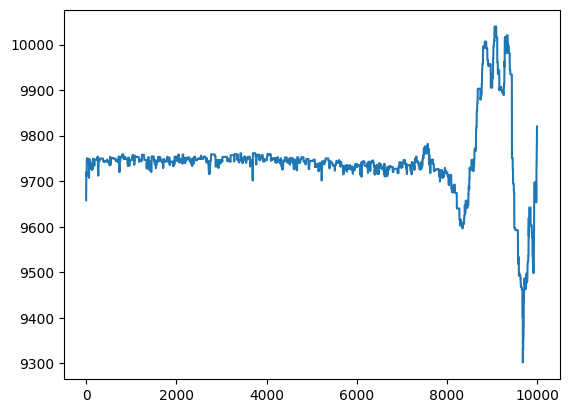

In [49]:
X, Y = data
plt.plot(X, Y)
plt.show()

In [5]:
%%time
surpluses = []

for _ in tqdm(range(10000)):
    sim = SimulatorSampledArrival(num_background_agents=25, 
                                  sim_time=24000, 
                                  lam=5e-4, 
                                  mean=1e5, 
                                  r=0.05, 
                                  shock_var=1e6, 
                                  q_max=10,
                                  pv_var=5e6,
                                  shade=[250,500])
    sim.run()
    fundamental_val = sim.markets[0].get_final_fundamental()
    values = []
    for agent_id in sim.agents:
        agent = sim.agents[agent_id]
        value = agent.get_pos_value() + agent.position * fundamental_val + agent.cash
        # print(agent.cash, agent.position, agent.get_pos_value(), value)
        values.append(value)
    surpluses.append(sum(values)/len(values))
print(sum(surpluses)/len(surpluses)*25)

  0%|          | 0/10000 [00:00<?, ?it/s]

tensor(14329.7041)
CPU times: user 47min 11s, sys: 12min, total: 59min 12s
Wall time: 8min 3s


In [6]:
%%time
surpluses = []

for _ in tqdm(range(10000)):
    sim = SimulatorSampledArrival(num_background_agents=25, 
                                  sim_time=1000, 
                                  lam=5e-3, 
                                  mean=1e5, 
                                  r=0.05, 
                                  shock_var=5e5, 
                                  q_max=10,
                                  pv_var=5e6,
                                  shade=[250,500])
    sim.run()
    fundamental_val = sim.markets[0].get_final_fundamental()
    values = []
    for agent_id in sim.agents:
        agent = sim.agents[agent_id]
        value = agent.get_pos_value() + agent.position * fundamental_val + agent.cash
        # print(agent.cash, agent.position, agent.get_pos_value(), value)
        values.append(value)
    surpluses.append(sum(values)/len(values))
print(sum(surpluses)/len(surpluses)*25)

  0%|          | 0/10000 [00:00<?, ?it/s]

tensor(10839.7383)
CPU times: user 14min 45s, sys: 3min 31s, total: 18min 16s
Wall time: 2min 25s


98720.796875


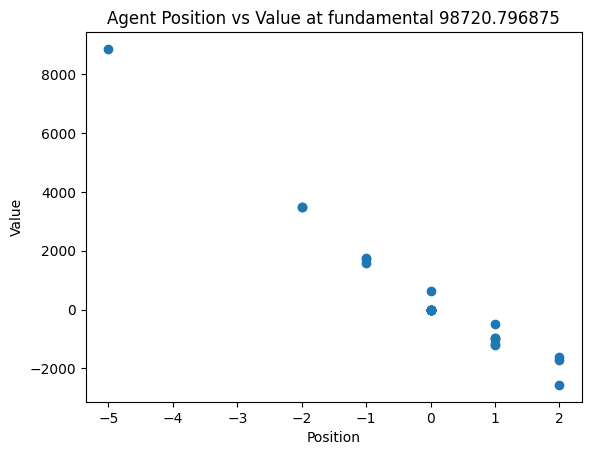

In [7]:
sim = SimulatorSampledArrival(num_background_agents=25, 
                              sim_time=1000, 
                              lam=5e-3, 
                              mean=1e5, 
                              r=0.05, 
                              shock_var=5e5, 
                              q_max=10,
                              pv_var=5e6,
                              shade=[250,500])
sim.run()
fundamental_val = sim.markets[0].get_final_fundamental()
values = []
for agent_id in sim.agents:
    agent = sim.agents[agent_id]
    value = agent.get_pos_value() + agent.position * fundamental_val + agent.cash
    # print(agent.cash, agent.position, agent.get_pos_value(), value)
    values.append(value)
surpluses.append(sum(values)/len(values))


positions = []
values = []
fundamental_val = sim.markets[0].get_final_fundamental()

for agent_id in sim.agents:
    agent = sim.agents[agent_id]
    value = agent.get_pos_value() + agent.position * fundamental_val + agent.cash
    # print(agent.cash, agent.position, agent.get_pos_value(), value)
    positions.append(agent.position)
    values.append(value)

import matplotlib.pyplot as plt

print(fundamental_val)
plt.scatter(positions, values)
plt.xlabel('Position')
plt.ylabel('Value')
plt.title(f'Agent Position vs Value at fundamental {fundamental_val}')
plt.show()


97220.203125


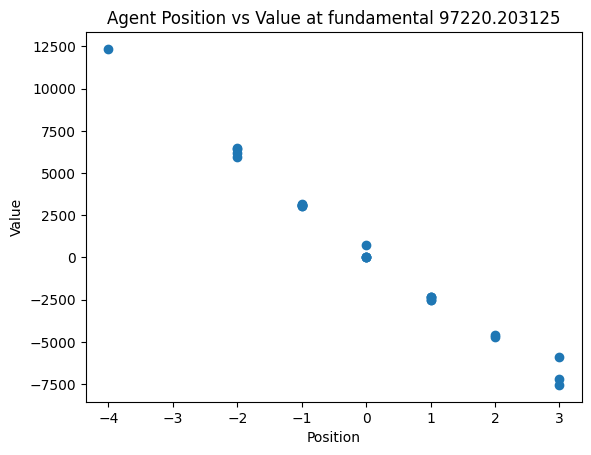

In [8]:
sim = SimulatorSampledArrival(num_background_agents=25, 
                              sim_time=1000, 
                              lam=5e-3, 
                              mean=1e5, 
                              r=0.05, 
                              shock_var=5e5, 
                              q_max=10,
                              pv_var=5e6,
                              shade=[250,500])
sim.run()
fundamental_val = sim.markets[0].get_final_fundamental()
values = []
for agent_id in sim.agents:
    agent = sim.agents[agent_id]
    value = agent.get_pos_value() + agent.position * fundamental_val + agent.cash
    # print(agent.cash, agent.position, agent.get_pos_value(), value)
    values.append(value)
surpluses.append(sum(values)/len(values))


positions = []
values = []
fundamental_val = sim.markets[0].get_final_fundamental()

for agent_id in sim.agents:
    agent = sim.agents[agent_id]
    value = agent.get_pos_value() + agent.position * fundamental_val + agent.cash
    # print(agent.cash, agent.position, agent.get_pos_value(), value)
    positions.append(agent.position)
    values.append(value)

import matplotlib.pyplot as plt

print(fundamental_val)
plt.scatter(positions, values)
plt.xlabel('Position')
plt.ylabel('Value')
plt.title(f'Agent Position vs Value at fundamental {fundamental_val}')
plt.show()


103123.8125


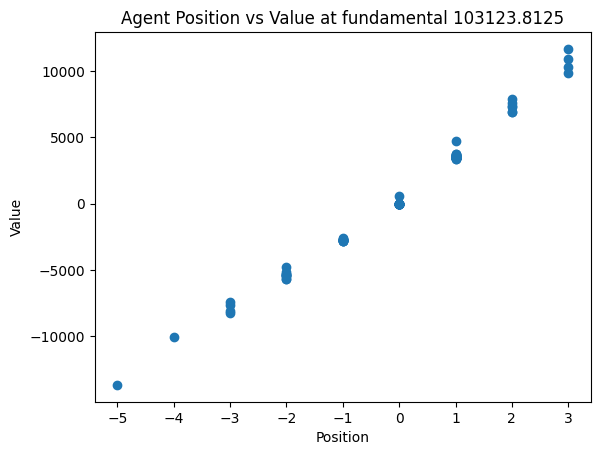

In [9]:
sim = SimulatorSampledArrival(num_background_agents=100, 
                              sim_time=1000, 
                              lam=5e-3, 
                              mean=1e5, 
                              r=0.05, 
                              shock_var=5e5, 
                              q_max=10,
                              pv_var=5e6,
                              shade=[250,500])
sim.run()
fundamental_val = sim.markets[0].get_final_fundamental()
values = []
for agent_id in sim.agents:
    agent = sim.agents[agent_id]
    value = agent.get_pos_value() + agent.position * fundamental_val + agent.cash
    # print(agent.cash, agent.position, agent.get_pos_value(), value)
    values.append(value)


positions = []
values = []
fundamental_val = sim.markets[0].get_final_fundamental()

for agent_id in sim.agents:
    agent = sim.agents[agent_id]
    value = agent.get_pos_value() + agent.position * fundamental_val + agent.cash
    # print(agent.cash, agent.position, agent.get_pos_value(), value)
    positions.append(agent.position)
    values.append(value)

import matplotlib.pyplot as plt

print(fundamental_val)
plt.scatter(positions, values)
plt.xlabel('Position')
plt.ylabel('Value')
plt.title(f'Agent Position vs Value at fundamental {fundamental_val}')
plt.show()
